# Preparation and Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import os
from common import *
import json
from pandas.io.json import json_normalize
import numpy as np

plt.style.use('thesis.mplstyle')

In [2]:
thousandsGroupingFormatter =  mpl.ticker.FuncFormatter(lambda x, p: '$'+format(int(x), ',').replace(',', '\,')+'$')

In [3]:
from pandas import Series


def otherSeries(seriesToBeOthered:Series, valuesToKeep:int):
    seriesToBeOthered_value_counts = seriesToBeOthered.value_counts()
    min_val = seriesToBeOthered_value_counts[valuesToKeep]
    keep_vals = seriesToBeOthered_value_counts[seriesToBeOthered_value_counts>min_val]
    otheredSeries = seriesToBeOthered.copy()
    otheredSeries[~(otheredSeries.isin(keep_vals.index)) & ~otheredSeries.isna()] = 'other'
    return otheredSeries

In [4]:
def flatten(l):
    return [item for sublist in l for item in sublist]

# Load and Combine Data

## Website Lists

### Tranco

In [5]:
workerStatusReport = pd.read_json('crawl_results_fingerprinting/workerStatusReport.json.gz')

workerStatusReport.currentTime = pd.to_datetime(workerStatusReport.currentTime)
workerStatusReport.startedAt = pd.to_datetime(workerStatusReport.startedAt)

workerStatusReport['runningFor'] = workerStatusReport.currentTime - workerStatusReport.startedAt


workerStatusReport['runningFor'] = workerStatusReport.currentTime - workerStatusReport.startedAt
workerStatusReport['runningForMinutes'] = (workerStatusReport.currentTime - workerStatusReport.startedAt) / np.timedelta64(1, 'm')


workerStatusReport

,currentTime,worker,startedAt,domain,domainNum,runningFor,runningForMinutes
0,2022-11-22 09:48:50.068000+00:00,0,2022-11-22 09:46:09.247000+00:00,fandom.com,24,0 days 00:02:40.821000,2.680350
1,2022-11-22 09:48:50.068000+00:00,1,2022-11-22 09:47:19.509000+00:00,cnn.com,25,0 days 00:01:30.559000,1.509317
2,2022-11-22 09:48:50.068000+00:00,2,2022-11-22 09:44:10.561000+00:00,macromedia.com,17,0 days 00:04:39.507000,4.658450
3,2022-11-22 09:48:50.068000+00:00,3,2022-11-22 09:47:27.036000+00:00,forbes.com,26,0 days 00:01:23.032000,1.383867
4,2022-11-22 09:48:50.068000+00:00,4,2022-11-22 09:48:48.690000+00:00,bbc.co.uk,29,0 days 00:00:01.378000,0.022967
...,...,...,...,...,...,...,...
29647,2022-12-05 08:56:58.786000+00:00,7,2022-12-05 07:46:58.364000+00:00,dimelo.com,12106,0 days 01:10:00.422000,70.007033
29648,2022-12-05 08:56:58.786000+00:00,8,2022-12-05 07:46:58.364000+00:00,morningadvertiser.co.uk,12107,0 days 01:10:00.422000,70.007033
29649,2022-12-05 08:56:58.786000+00:00,9,2022-12-05 07:46:58.365000+00:00,swansonmeals.ca,12108,0 days 01:10:00.421000,70.007017
29650,2022-12-05 08:56:58.786000+00:00,10,2022-12-05 07:49:49.936000+00:00,isp-thailand.com,12113,0 days 01:07:08.850000,67.147500


In [6]:
data = workerStatusReport.pivot_table(index='currentTime',columns='worker',aggfunc={'runningForMinutes':'max'})
data

runningForMinutes                        \
worker                                          0          1          2    
currentTime                                                                
2022-11-22 09:48:50.068000+00:00          2.680350   1.509317   4.658450   
2022-11-22 09:58:50.069000+00:00          0.444833   4.972350   2.179617   
2022-11-22 10:08:50.102000+00:00          3.496733   4.283333   0.974167   
2022-11-22 10:23:51.408000+00:00         10.001267  10.001000   2.257817   
2022-11-22 10:33:51.410000+00:00         20.001300   0.334183  12.257850   
...                                            ...        ...        ...   
2022-12-05 08:16:58.459000+00:00         30.001767  30.001633  30.001633   
2022-12-05 08:26:58.540000+00:00         40.003117  40.002983  40.002983   
2022-12-05 08:36:58.622000+00:00         50.004483  50.004350  50.004350   
2022-12-05 08:46:58.704000+00:00         60.005850  60.005717  60.005717   
2022-12-05 08:56:58.786000+00:00         70.007217  70.007083  70.007083   

                                                                              \
worker                                   3          4          5          6    
currentTime                                                                    
2022-11-22 09:48:50.068000+00:00   1.383867   0.022967   0.436333   0.201617   
2022-11-22 09:58:50.069000+00:00   1.393267   0.758033  10.436350   1.809067   
2022-11-22 10:08:50.102000+00:00   0.421283  10.758583  20.436900   0.160467   
2022-11-22 10:23:51.408000+00:00  10.000983   3.855483   3.855767   0.831967   
2022-11-22 10:33:51.410000+00:00   3.308167   1.536050   0.127433   1.876567   
...                                     ...        ...        ...        ...   
2022-12-05 08:16:58.459000+00:00  30.001617  30.001617  30.001600  30.001600   
2022-12-05 08:26:58.540000+00:00  40.002967  40.002967  40.002950  40.002950   
2022-12-05 08:36:58.622000+00:00  50.004333  50.004333  50.004317  50.004317   
2022-12-05 08:46:58.704000+00:00  60.005700  60.005700  60.005683  60.005683   
2022-12-05 08:56:58.786000+00:00  70.007067  70.007067  70.007050  70.007050   

                                                                              \
worker                                   7          8          9          10   
currentTime                                                                    
2022-11-22 09:48:50.068000+00:00   4.585967   9.999500   3.787950   4.605383   
2022-11-22 09:58:50.069000+00:00   1.772683   3.780000   4.844883   2.811883   
2022-11-22 10:08:50.102000+00:00   6.719800   1.649300   1.427500   8.283350   
2022-11-22 10:23:51.408000+00:00   3.411867  10.000933   1.064667   2.704250   
2022-11-22 10:33:51.410000+00:00   1.538000   5.437300   5.158233   7.362717   
...                                     ...        ...        ...        ...   
2022-12-05 08:16:58.459000+00:00  30.001583  30.001583  30.001567  27.142050   
2022-12-05 08:26:58.540000+00:00  40.002933  40.002933  40.002917  37.143400   
2022-12-05 08:36:58.622000+00:00  50.004300  50.004300  50.004283  47.144767   
2022-12-05 08:46:58.704000+00:00  60.005667  60.005667  60.005650  57.146133   
2022-12-05 08:56:58.786000+00:00  70.007033  70.007033  70.007017  67.147500   

                                             
worker                                   11  
currentTime                                  
2022-11-22 09:48:50.068000+00:00   4.244583  
2022-11-22 09:58:50.069000+00:00   3.341667  
2022-11-22 10:08:50.102000+00:00   1.552883  
2022-11-22 10:23:51.408000+00:00   4.354817  
2022-11-22 10:33:51.410000+00:00   1.557233  
...                                     ...  
2022-12-05 08:16:58.459000+00:00  28.259067  
2022-12-05 08:26:58.540000+00:00  38.260417  
2022-12-05 08:36:58.622000+00:00  48.261783  
2022-12-05 08:46:58.704000+00:00  58.263150  
2022-12-05 08:56:58.786000+00:00  68.264517  

[2471 rows x 12 columns]

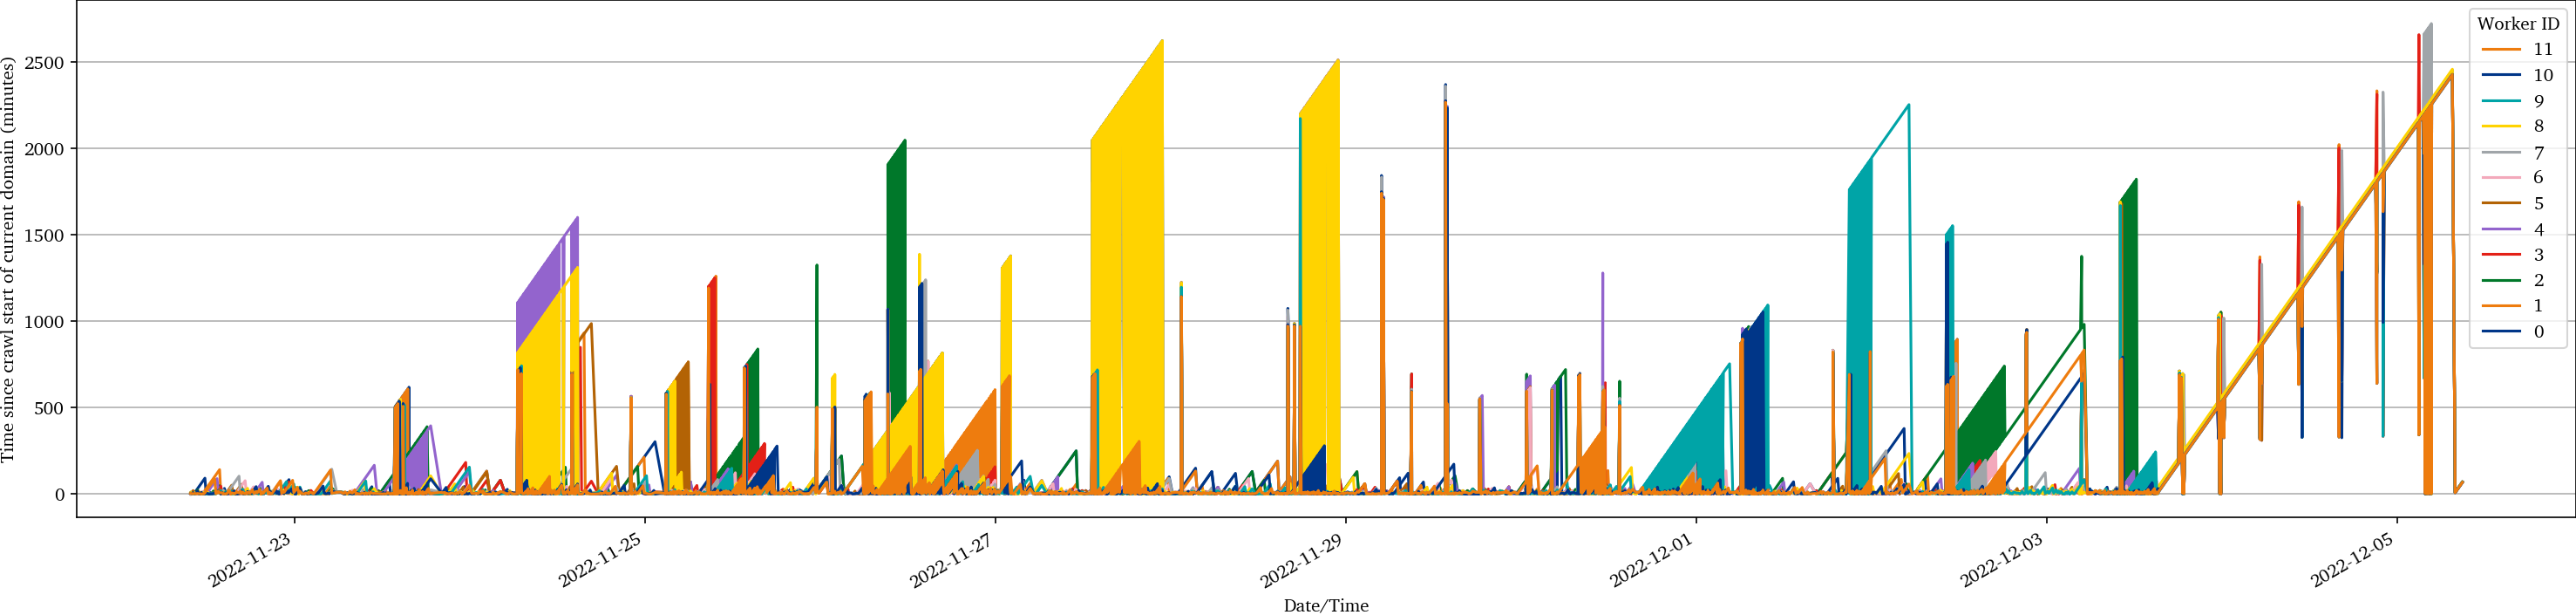

In [7]:
fig, ax = plt.subplots()

fig.set_figheight(5)
fig.set_figwidth(20)

data.plot(ax = ax)


ax.set_ylabel('Time since crawl start of current domain (minutes)')
ax.set_xlabel('Date/Time')


ax.grid(
    visible=True,
    axis='y')
ax.set_axisbelow(True)

handles = ax.get_legend_handles_labels()
ax.legend(
    reversed(handles[0]),
    reversed([c[1] for c in  data.columns]),
    # loc='center left',
    # bbox_to_anchor=(1.02, 0.5),
    ncol=1,
    title='Worker ID',
    )

fig.savefig('images/worker_status_overview.pdf')

In [8]:
data.loc['2022-11-27 16:48:50.068000+00:00':'2022-11-27 22:14:31.181000+00:00',('runningForMinutes',8)]
# data.columns

currentTime
2022-11-27 16:50:23.287000+00:00    2262.727150
2022-11-27 17:00:24.878000+00:00    2272.753667
2022-11-27 17:01:15.717000+00:00      10.192150
2022-11-27 17:10:25.049000+00:00    2282.756517
2022-11-27 17:20:25.634000+00:00    2292.766267
2022-11-27 17:30:31.228000+00:00    2302.859500
2022-11-27 17:40:52.831000+00:00       8.628833
2022-11-27 17:41:08.262000+00:00    2313.476733
2022-11-27 17:50:54.092000+00:00       6.517317
2022-11-27 17:51:08.799000+00:00    2323.485683
2022-11-27 18:01:17.277000+00:00    2333.626983
2022-11-27 18:03:03.457000+00:00       7.886167
2022-11-27 18:11:17.424000+00:00    2343.629433
2022-11-27 18:13:03.789000+00:00       0.626967
2022-11-27 18:21:21.797000+00:00    2353.702317
2022-11-27 18:23:03.937000+00:00       7.316683
2022-11-27 18:31:21.814000+00:00    2363.702600
2022-11-27 18:33:03.943000+00:00       2.583150
2022-11-27 18:41:54.857000+00:00    2374.253317
2022-11-27 18:43:07.501000+00:00       2.716817
2022-11-27 18:51:58.950000+0